In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\Ahan Bhatt\AppData\Local\Temp\ipykernel_30800\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

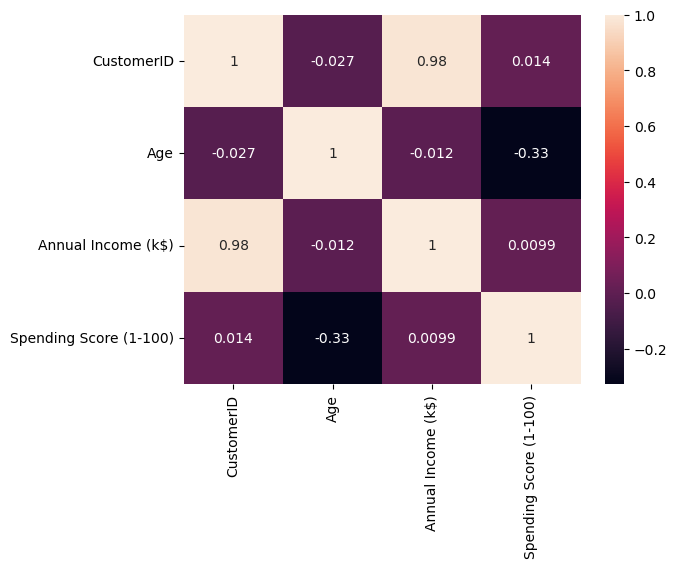

In [14]:
sns.heatmap(df.corr(),annot=True)


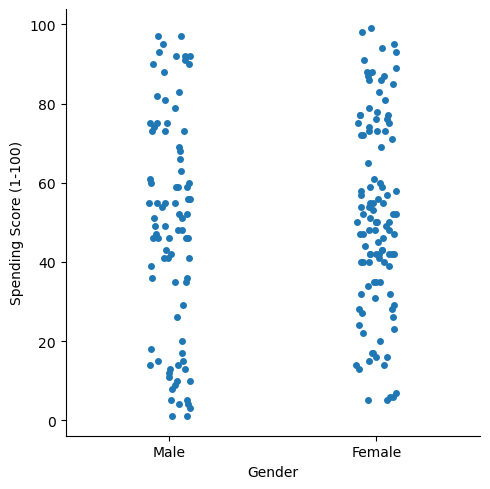

In [20]:
sns.catplot(data=df,x='Gender',y='Spending Score (1-100)')

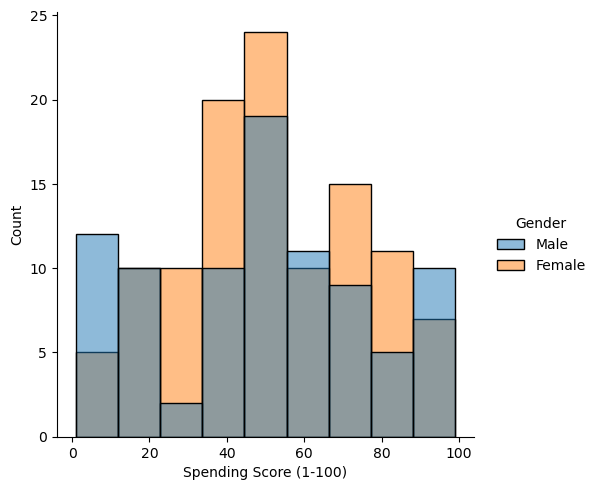

In [24]:
sns.displot(data=df,x='Spending Score (1-100)',hue='Gender')

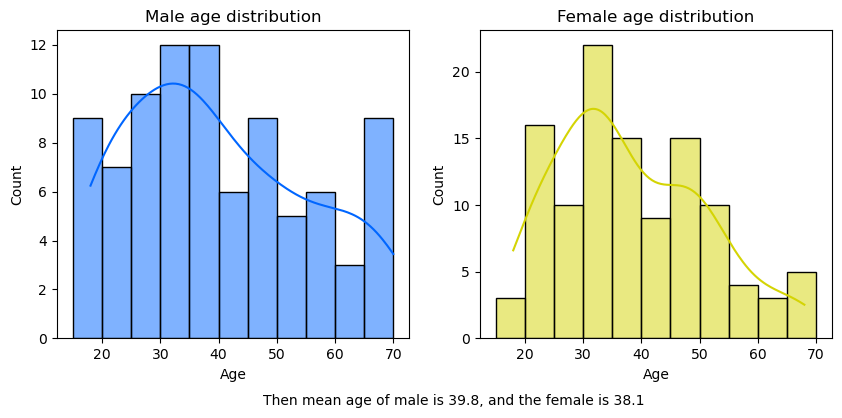

In [37]:
male = df[df['Gender']=='Male']['Age']
female = df[df['Gender']=='Female']['Age']

plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title('Male age distribution')


plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

<Axes: >

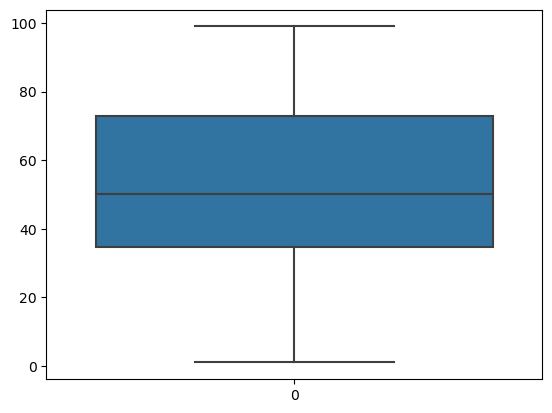

In [27]:
sns.boxplot(df['Spending Score (1-100)'])


<Axes: >

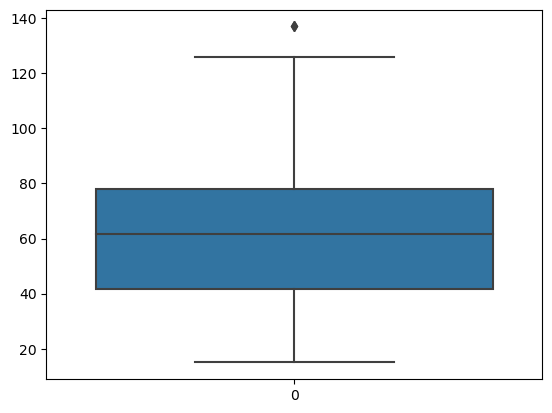

In [30]:
sns.boxplot(df['Annual Income (k$)'])

In [42]:
num = [var for var in df.columns if df[var].dtype != 'O']

In [43]:
num

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [83]:
from sklearn.preprocessing import StandardScaler
int_label=['Age','Annual Income (k$)','Spending Score (1-100)']
scaler = StandardScaler()
df[int_label] = scaler.fit_transform(df[int_label])


In [84]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

In [87]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [88]:
df.drop(['CustomerID'],axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [89]:
from sklearn import cluster

In [90]:
error=[]
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

In [91]:
error

[667299.28,
 167169.74460261408,
 74551.20399322949,
 42138.96767212088,
 27122.83952212219,
 19064.3043674002,
 14114.811244480195,
 10931.363178947131,
 8718.802894490307,
 7117.855386594263]

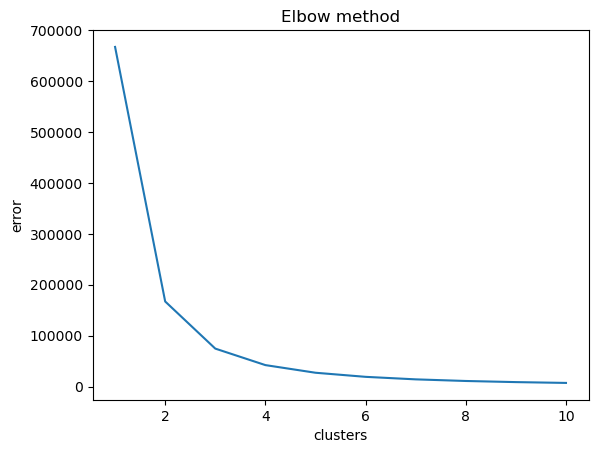

In [92]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('clusters')
plt.ylabel('error')
plt.show()

In [93]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)
     
km_model.fit(df)
     

C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [94]:
pred = km_model.predict(df)
pred
     

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [95]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 

print("Silhouette Score(n=3):",silhouette_score(df,pred))

Silhouette Score(n=3): 0.5809784029649804
